<h1 align="center">AISC2000 - Group Trees - Assignment 3 Task Distribution and Status</h1>

| Individual Responsible | Task | Status | Results |
|:---|:---|:---|:---|
| **SUBHASH PAVAN CHAKRAVARTHY SOMAROUTHU** | Data Preprocessing and Feature Engineering | Class Separability Checked? Train and Test Handled Correctly? | Featureset with best separability? Steps taken before and after train test split? |
|  | Feature Importance Analysis (Random Forests) | Implemented? Compared with LIME/SHAP? | Key findings from comparison |
|  | Check feature importance using Random Forests | Implemented? | Key findings |
| **KANIKA** | Data Visualization for Feature Engineering | Visualizations created before model training? | Insights from visualizations |
|  | Next Steps Analysis | List out 2-3 possible next steps for each model |  |
|  | Summarize understanding of outputs from feature importance and tuning | Summary completed? | Key insights |
|  | Final Report Compilation | Compile all sections, ensure HTML export of Jupyter notebook |  |
| **GOKUL KRISHNA POURNAMI GOPI** | SVM Model (Count-Vectors with Unigram) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | SVM Model (TF-IDF with Unigram+Bigram) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Model Evaluation (All Models) | Confusion Matrix Built? AUC plotted? Accuracy computed? | F1 Score for Positive/Negative, AUC, Accuracy |
|  | Run 3 rounds of empirical tuning on SVM models | Tuning completed? | Performance improvements |
| **APARNA JAYAKUMAR RESMI** | Random Forest Model (Parking Identification) | Config of the model trained? Train Time? | Ensure >5000 data points in test set |
|  | Random Forest Model (Parking Validation) | Config of the model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on Random Forest models | Tuning completed? | Performance improvements |
| **CLIFFORD ADDISON** | XGBoost Model (Parking Identification) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | XGBoost Model (Parking Validation) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on XGBoost models | Tuning completed? | Performance improvements |
| **OBIANUJU NONYEREM ANUMA** | 1 Hidden Layer ANN (Parking Identification) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | 1 Hidden Layer ANN (Parking Validation) | Config of model trained? Train Time? | Ensure >5000 data points in test set |
|  | Run 3 rounds of empirical tuning on ANN models | Tuning completed? | Performance improvements |
| **ABDULLAH IFTEQAR MOHAMMED** | Multi-Hidden Layer ANN (Parking Identification) | Config of model trained? Train Time? Use dropout, regularization, early stopping, and weight initialization. |
|  | Multi-Hidden Layer ANN (Parking Validation) | Config of model trained? Train Time? Use dropout, regularization, early stopping, and weight initialization. |
|  | Run 3 rounds of empirical tuning on Multi-Hidden Layer ANN models | Tuning completed? | Performance improvements |
| **MUKUL GARG** | Naive Bayes Model (One-Hot Vectors for Unigram+Bigram) | Config of model trained? Train Time? Ensure >5000 data points in test set. |
|  | Interpretability Analysis (All Models) | Interpretability Implemented? Local or Global? 2 interesting findings per model. |
|  | Run 3 rounds of empirical tuning on Naive Bayes model | Tuning completed? | Performance improvements |
|  | Cross Validation (All Models) | Type of Cross Validation performed? Findings of Cross Validation? |  |
| **AMRUTH RAJ MANCHIKANTI** | SVM Model using word2vec (CBOW or Skipgram)  | Config of model trained? Vector size (64-300)? Train Time? Use CBOW or Skipgram. |
|  | SVM Model using other word embedding (GloVe, Fasttext, or ELMo)  | Config of model trained? Embedding type chosen?| Train Time?| Ensure >5000 data points in test set. |
|  | Run 3 rounds of empirical tuning on word embedding SVM models | Tuning completed? | Performance improvements |
| **SANGEETH KUMARASINGHE** | LIME Analysis for All Models | LIME implemented for each model? | Key local interpretability findings |
|  | SHAP Analysis for All Models | SHAP values calculated for each model? | Global and local interpretability insights |
|  | Compare LIME and SHAP results | Comparison completed? | Key differences and similarities between LIME and SHAP interpretations |

## Individual Responsibilities for All Team Members
- Contribute to empirical tuning (3 rounds for your assigned models) and derive insights from each iteration.
- Review and validate results for your assigned models.
- Explain tuning approaches used in each iteration for your models.
- Call out what else could be done to tune your models and how it would have helped (with numbers) at the top/bottom of your section in the notebook.
- Ensure >5000 data points in the test set for your models' Confusion Matrix, AUC, etc.
- Submit your part of the Python notebook to be run sequentially end to end and exported as an HTML file

In [87]:
pd.set_option('display.max_columns', None)

In [48]:
#pip install lime

In [49]:
# Loading data from your drive
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [50]:
# Importing the necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

nltk.download('punkt')

import gensim

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




import lime

import pickle
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
# pip install emoji


In [52]:
#pip install wordsegment


In [53]:
#pip install contractions

In [54]:
# # Load the data
# df_chunks = []
# for chunk in pd.read_csv('/content/extracted_data/combined_data.csv', chunksize=100000):
#     df_chunks.append(chunk)
# df = pd.concat(df_chunks, ignore_index=True)
# print("Shape of Dataframe:", df.shape)

In [94]:

# Loading the Yelp business dataset JSON file

file_path = '/content/yelp_academic_dataset_business.json'
with open(file_path, 'r', encoding='utf-8') as file:
    business_data = [json.loads(line) for line in file]


business_df = pd.DataFrame(business_data)


business_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [64]:
business_df.shape

(150346, 14)

In [57]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [65]:
business_df['attributes'].head(20)

,attributes
0,{'ByAppointmentOnly': 'True'}
1,{'BusinessAcceptsCreditCards': 'True'}
2,"{'BikeParking': 'True', 'BusinessAcceptsCredit..."
3,"{'RestaurantsDelivery': 'False', 'OutdoorSeati..."
4,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc..."
5,"{'BusinessParking': 'None', 'BusinessAcceptsCr..."
6,"{'BusinessAcceptsCreditCards': 'True', 'Restau..."
7,None
8,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '..."
9,"{'RestaurantsAttire': ''casual'', 'Restaurants..."


In [95]:
attributes_df = pd.json_normalize(business_df['attributes'])
attributes_df.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ByAppointmentOnly           42339 non-null   object
 1   BusinessAcceptsCreditCards  119765 non-null  object
 2   BikeParking                 72638 non-null   object
 3   RestaurantsPriceRange2      85314 non-null   object
 4   CoatCheck                   5584 non-null    object
 5   RestaurantsTakeOut          59857 non-null   object
 6   RestaurantsDelivery         56282 non-null   object
 7   Caters                      40127 non-null   object
 8   WiFi                        56914 non-null   object
 9   BusinessParking             91085 non-null   object
 10  WheelchairAccessible        28953 non-null   object
 11  HappyHour                   15171 non-null   object
 12  OutdoorSeating              48802 non-null   object
 13  HasTV                       4

In [96]:
# replacing nan values with empty dictionary
attributes_df['BusinessParking'] = attributes_df['BusinessParking'].apply(lambda x: {} if pd.isna(x) else x)


def convert_to_dict(value):
    if isinstance(value, dict):
        return value
    elif isinstance(value, str):
        try:

            return ast.literal_eval(value)
        except (ValueError, SyntaxError):

            return {}
    else:

        return {}


attributes_df['BusinessParking'] = attributes_df['BusinessParking'].apply(convert_to_dict)




In [97]:
parking_df = pd.json_normalize(attributes_df['BusinessParking'])



parking_df.columns = [f'BusinessParking_{col}' for col in parking_df.columns]

parking_df.head()

,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False
3,False,True,False,False,False
4,None,None,None,True,False


In [98]:
attributes_df = pd.concat([attributes_df.drop(columns=['BusinessParking']), parking_df], axis=1)



In [99]:
attributes_df.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
3,False,False,True,1,NaN,True,False,True,u'free',NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False


In [100]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ByAppointmentOnly           42339 non-null   object
 1   BusinessAcceptsCreditCards  119765 non-null  object
 2   BikeParking                 72638 non-null   object
 3   RestaurantsPriceRange2      85314 non-null   object
 4   CoatCheck                   5584 non-null    object
 5   RestaurantsTakeOut          59857 non-null   object
 6   RestaurantsDelivery         56282 non-null   object
 7   Caters                      40127 non-null   object
 8   WiFi                        56914 non-null   object
 9   WheelchairAccessible        28953 non-null   object
 10  HappyHour                   15171 non-null   object
 11  OutdoorSeating              48802 non-null   object
 12  HasTV                       45084 non-null   object
 13  RestaurantsReservations     4

In [101]:
merged_df = pd.concat([business_df, attributes_df], axis=1)
merged_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False,True,True,2,False,False,False,False,u'no',True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,False,True,1,NaN,True,False,True,u'free',NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False


In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [103]:
parking_cols = ['BikeParking','BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated',
                'BusinessParking_lot', 'BusinessParking_valet']

merged_df['has_parking'] = merged_df[parking_cols].any(axis=1)

merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False,True,True,2,False,False,False,False,u'no',True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False,False,True,1,NaN,True,False,True,u'free',NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False,True


Business Details:

City: Some cities may have more businesses with parking than others.
State: Similar to city, state laws and geography might influence parking availability.
Postal Code: This could capture some regional variance.
Stars (Rating): Higher-rated businesses may offer parking to improve customer experience.
Review Count: More popular businesses might be more likely to provide parking due to higher customer volume.
Is Open (Business Status): Businesses that are currently open may be more likely to maintain parking areas.
Attributes from Exploded Columns:

ByAppointmentOnly: Businesses that operate by appointment only may not need parking.
BusinessAcceptsCreditCards: This could be an indicator of modernized services, which might correlate with parking availability.
RestaurantsPriceRange2: Higher-priced restaurants might offer parking as part of their customer experience.
RestaurantsTakeOut: Takeout-focused businesses may or may not need parking.
WiFi: Businesses offering WiFi might cater to customers who stay longer and thus provide parking.
WheelchairAccessible: Parking facilities may be more common in accessible businesses.
OutdoorSeating: This could be a proxy for outdoor space, which may correlate with available parking.
RestaurantsGoodForGroups: Businesses catering to groups might have parking to accommodate larger parties.
DriveThru: Drive-thru services may suggest availability of parking or space around the business.
NoiseLevel: Quieter or less crowded businesses might have different parking needs.
GoodForMeal: Attributes related to meals (breakfast, lunch, etc.) might correlate with the need for parking.
Other Parking-Related Features:

BusinessAcceptsBitcoin, Smoking, GoodForDancing, Music: These might be indicators of customer experience that could indirectly influence parking availability.

In [104]:
# Defining feature columns for the model
final_columns = [
    'name','city', 'state', 'stars', 'is_open','latitude','longitude',
    'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
    'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'WiFi',
    'WheelchairAccessible', 'OutdoorSeating', 'RestaurantsGoodForGroups',
    'DriveThru', 'NoiseLevel', 'GoodForMeal','Alcohol', 'BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated',
                'BusinessParking_lot', 'BusinessParking_valet', 'has_parking'
]

EDA_dataset=merged_df[final_columns]
EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,OutdoorSeating,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,Alcohol,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,True,2,False,u'no',True,False,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,False,True,1,True,u'free',NaN,False,NaN,NaN,NaN,NaN,u'none',False,True,False,False,False,True
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,NaN,True,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False,True


In [107]:
# Saving dataset for EDA
#EDA_dataset.to_csv('EDA_dataset.csv', index=False)

In [108]:
# give your dataset path
# EDA_dataset=pd.read_csv('/content/EDA_dataset.csv')
# EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,OutdoorSeating,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,Alcohol,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,True,2.0,False,u'no',True,False,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,True
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,False,True,1.0,True,u'free',NaN,False,NaN,NaN,NaN,NaN,u'none',False,True,False,False,False,True
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,NaN,True,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True


**Data cleaning, preprocessing and feature engineering for Model**

In [109]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   name                        150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   stars                       150346 non-null  float64
 4   is_open                     150346 non-null  int64  
 5   latitude                    150346 non-null  float64
 6   longitude                   150346 non-null  float64
 7   ByAppointmentOnly           42299 non-null   object 
 8   BusinessAcceptsCreditCards  119692 non-null  object 
 9   BikeParking                 72558 non-null   object 
 10  RestaurantsPriceRange2      85280 non-null   float64
 11  RestaurantsTakeOut          57752 non-null   object 
 12  WiFi                        56864 non-null   object 
 13  WheelchairAcce

In [110]:
# Value_counts
for col in EDA_dataset.columns:
    print(f"Value counts for {col}:")
    print(EDA_dataset[col].value_counts(dropna=False))
    print("\n")


Value counts for name:
name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64


Value counts for city:
city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64


Value counts for state:
state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI

In [111]:
# percentage of missing values
missing_percentage = (EDA_dataset.isnull().sum() / len(EDA_dataset)) * 100
missing_percentage


,0
name,0.000000
city,0.000000
state,0.000000
stars,0.000000
is_open,0.000000
latitude,0.000000
longitude,0.000000
ByAppointmentOnly,71.865563
BusinessAcceptsCreditCards,20.388969
BikeParking,51.739321


In [112]:
# Imputing missing values
EDA_dataset['ByAppointmentOnly'].fillna(False, inplace=True)

# Dropping unnecessary columns
EDA_dataset.drop(columns=['BusinessAcceptsCreditCards', 'OutdoorSeating', 'DriveThru',
                          'NoiseLevel', 'GoodForMeal', 'Alcohol'], inplace=True)

# Filling missing values with False
EDA_dataset['BikeParking'].fillna(False, inplace=True)
EDA_dataset['RestaurantsPriceRange2'].fillna(EDA_dataset['RestaurantsPriceRange2'].mode()[0], inplace=True)
EDA_dataset['RestaurantsTakeOut'].fillna(False, inplace=True)
EDA_dataset['WiFi'].fillna('no', inplace=True)
EDA_dataset['WheelchairAccessible'].fillna(False, inplace=True)
EDA_dataset['RestaurantsGoodForGroups'].fillna(False, inplace=True)

# I
EDA_dataset.loc[EDA_dataset['has_parking'] == False, ['BusinessParking_garage',
                                                       'BusinessParking_street',
                                                       'BusinessParking_validated',
                                                       'BusinessParking_lot',
                                                       'BusinessParking_valet',
                                                       'BikeParking']] = False

for col in ['BusinessParking_garage', 'BusinessParking_street',
            'BusinessParking_validated', 'BusinessParking_lot',
            'BusinessParking_valet', 'BikeParking']:
    EDA_dataset.loc[EDA_dataset['has_parking'] == True, col] = EDA_dataset.loc[EDA_dataset['has_parking'] == True, col].fillna(True)


In [113]:
# percentage of missing values
missing_percentage = (EDA_dataset.isnull().sum() / len(EDA_dataset)) * 100
missing_percentage


,0
name,0.0
city,0.0
state,0.0
stars,0.0
is_open,0.0
latitude,0.0
longitude,0.0
ByAppointmentOnly,0.0
BikeParking,0.0
RestaurantsPriceRange2,0.0


In [114]:

# Target variable creation
def create_parking_status(row):
    if row['has_parking'] == False:
        return 0  # No parking
    elif row['has_parking'] == True and row['BusinessParking_validated'] == False:
        return 1  # Has parking but not validated
    elif row['has_parking'] == True and row['BusinessParking_validated'] == True:
        return 2  # Has parking and validated


EDA_dataset['parking_status'] = EDA_dataset.apply(create_parking_status, axis=1)

EDA_dataset.head()


,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking,parking_status
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,False,2.0,False,no,False,False,False,False,False,False,False,False,0
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,False,False,2.0,False,no,False,False,False,False,False,False,False,False,0
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,2.0,False,u'no',True,False,False,False,False,True,False,True,1
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,True,1.0,True,u'free',False,False,False,True,False,False,False,True,1
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,False,True,2.0,True,no,True,False,True,True,True,True,False,True,2


In [115]:
#
for col in EDA_dataset.columns:
    print(f"Value counts for {col}:")
    print(EDA_dataset[col].value_counts(dropna=False))
    print("\n")


Value counts for name:
name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64


Value counts for city:
city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64


Value counts for state:
state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI

In [116]:
# Data fomatting in Wifi column


EDA_dataset['WiFi'] = EDA_dataset['WiFi'].replace({
    "no": "no",
    "u'no'": "no",
    "'no'": "no",
    "u'free'": "free",
    "'free'": "free",
    "paid": "paid",
    "u'paid'": "paid",
    "'paid'": "paid",
    'None': 'no'
})


EDA_dataset['WiFi'].fillna('no', inplace=True)






print(EDA_dataset['WiFi'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       150346 non-null  object 
 1   city                       150346 non-null  object 
 2   state                      150346 non-null  object 
 3   stars                      150346 non-null  float64
 4   is_open                    150346 non-null  int64  
 5   latitude                   150346 non-null  float64
 6   longitude                  150346 non-null  float64
 7   ByAppointmentOnly          150346 non-null  bool   
 8   BikeParking                150346 non-null  bool   
 9   RestaurantsPriceRange2     150346 non-null  float64
 10  RestaurantsTakeOut         150346 non-null  bool   
 11  WiFi                       150346 non-null  object 
 12  WheelchairAccessible       150346 non-null  bool   
 13  RestaurantsGoodForGroups   15

In [117]:
EDA_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       150346 non-null  object 
 1   city                       150346 non-null  object 
 2   state                      150346 non-null  object 
 3   stars                      150346 non-null  float64
 4   is_open                    150346 non-null  int64  
 5   latitude                   150346 non-null  float64
 6   longitude                  150346 non-null  float64
 7   ByAppointmentOnly          150346 non-null  bool   
 8   BikeParking                150346 non-null  bool   
 9   RestaurantsPriceRange2     150346 non-null  float64
 10  RestaurantsTakeOut         150346 non-null  bool   
 11  WiFi                       150346 non-null  object 
 12  WheelchairAccessible       150346 non-null  bool   
 13  RestaurantsGoodForGroups   15

**Feature Engineering**

Created new column city_encoded which is the frequency of cities

In [119]:

# Frequency encoding for city
city_counts = EDA_dataset['city'].value_counts()
EDA_dataset['city_encoded'] = EDA_dataset['city'].map(city_counts)

EDA_dataset.head()

In [123]:
EDA_dataset.head()

,name,city,state,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,has_parking,parking_status,city_encoded
0,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,0,34.426679,-119.711197,True,False,2.0,False,no,False,False,False,False,False,False,False,False,0,3829
1,The UPS Store,Affton,MO,3.0,1,38.551126,-90.335695,False,False,2.0,False,no,False,False,False,False,False,False,False,False,0,36
2,Target,Tucson,AZ,3.5,0,32.223236,-110.880452,False,True,2.0,False,no,True,False,False,False,False,True,False,True,1,9250
3,St Honore Pastries,Philadelphia,PA,4.0,1,39.955505,-75.155564,False,True,1.0,True,free,False,False,False,True,False,False,False,True,1,14569
4,Perkiomen Valley Brewery,Green Lane,PA,4.5,1,40.338183,-75.471659,False,True,2.0,True,no,True,False,True,True,True,True,False,True,2,10


In [124]:
# REMOVING UNNECESSARY COLUMNS
EDA_dataset.drop(columns=['city', 'state','name','BusinessParking_validated','has_parking'], inplace=True)

In [125]:
EDA_dataset.head()

,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,True,False,2.0,False,no,False,False,False,False,False,False,0,3829
1,3.0,1,38.551126,-90.335695,False,False,2.0,False,no,False,False,False,False,False,False,0,36
2,3.5,0,32.223236,-110.880452,False,True,2.0,False,no,True,False,False,False,True,False,1,9250
3,4.0,1,39.955505,-75.155564,False,True,1.0,True,free,False,False,False,True,False,False,1,14569
4,4.5,1,40.338183,-75.471659,False,True,2.0,True,no,True,False,True,True,True,False,2,10


In [126]:
# categorical encoding
bool_columns = ['ByAppointmentOnly', 'BikeParking',
                'RestaurantsTakeOut', 'WheelchairAccessible',
                'RestaurantsGoodForGroups',
                'BusinessParking_garage', 'BusinessParking_street',
                 'BusinessParking_lot',
                'BusinessParking_valet']


EDA_dataset[bool_columns] = EDA_dataset[bool_columns].astype(int)

EDA_dataset.head()


,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,1,0,2.0,0,no,0,0,0,0,0,0,0,3829
1,3.0,1,38.551126,-90.335695,0,0,2.0,0,no,0,0,0,0,0,0,0,36
2,3.5,0,32.223236,-110.880452,0,1,2.0,0,no,1,0,0,0,1,0,1,9250
3,4.0,1,39.955505,-75.155564,0,1,1.0,1,free,0,0,0,1,0,0,1,14569
4,4.5,1,40.338183,-75.471659,0,1,2.0,1,no,1,0,1,1,1,0,2,10


In [128]:
# modifying wifi column

EDA_dataset['WiFi'] = EDA_dataset['WiFi'].apply(lambda x: 0 if x == 'no' else 1)

EDA_dataset.head()


,stars,is_open,latitude,longitude,ByAppointmentOnly,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,WheelchairAccessible,RestaurantsGoodForGroups,BusinessParking_garage,BusinessParking_street,BusinessParking_lot,BusinessParking_valet,parking_status,city_encoded
0,5.0,0,34.426679,-119.711197,1,0,2.0,0,0,0,0,0,0,0,0,0,3829
1,3.0,1,38.551126,-90.335695,0,0,2.0,0,0,0,0,0,0,0,0,0,36
2,3.5,0,32.223236,-110.880452,0,1,2.0,0,0,1,0,0,0,1,0,1,9250
3,4.0,1,39.955505,-75.155564,0,1,1.0,1,1,0,0,0,1,0,0,1,14569
4,4.5,1,40.338183,-75.471659,0,1,2.0,1,0,1,0,1,1,1,0,2,10


In [129]:
#Saving the dataset for modelling

#EDA_dataset.to_csv('Model_dataset.csv', index=False)



In [130]:
model_df=pd.read_csv('/content/Model_dataset.csv')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   stars                     150346 non-null  float64
 1   is_open                   150346 non-null  int64  
 2   latitude                  150346 non-null  float64
 3   longitude                 150346 non-null  float64
 4   ByAppointmentOnly         150346 non-null  int64  
 5   BikeParking               150346 non-null  int64  
 6   RestaurantsPriceRange2    150346 non-null  float64
 7   RestaurantsTakeOut        150346 non-null  int64  
 8   WiFi                      150346 non-null  int64  
 9   WheelchairAccessible      150346 non-null  int64  
 10  RestaurantsGoodForGroups  150346 non-null  int64  
 11  BusinessParking_garage    150346 non-null  int64  
 12  BusinessParking_street    150346 non-null  int64  
 13  BusinessParking_lot       150346 non-null  i

Next steps:

split the dataset and use standardization and train the model

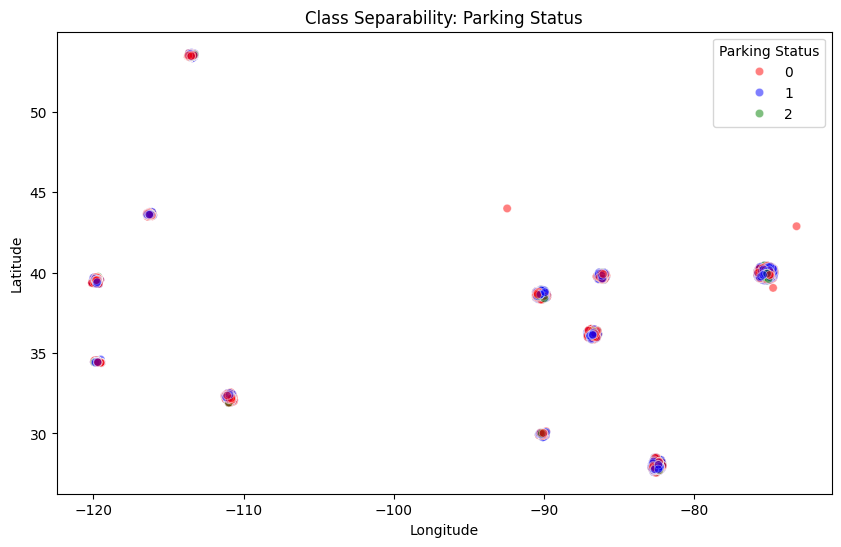

In [137]:


# Scatter plot to check class separability
plt.figure(figsize=(10, 6))
palette = {0: 'red', 1: 'blue',2:'green'}
sns.scatterplot(data=EDA_dataset, x='longitude', y='latitude', hue='parking_status',palette=palette,alpha=0.5)
plt.title('Class Separability: Parking Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Parking Status')
plt.show()


***Train test split***

In [132]:
x = EDA_dataset.drop(columns=['parking_status'])
y = EDA_dataset['parking_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (120276, 16)
Shape of x_test: (30070, 16)
Shape of y_train: (120276,)
Shape of y_test: (30070,)


In [139]:
#Class imbalance
y_train.value_counts()

,count
parking_status,
1,60919
0,53079
2,6278


In [142]:
#smote

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)



print(y_train_smote.value_counts())



parking_status
0    60919
1    60919
2    60919
Name: count, dtype: int64


# standardization

not needed for tree based models. But if you want to do ,please make sure to pass this in pipeline


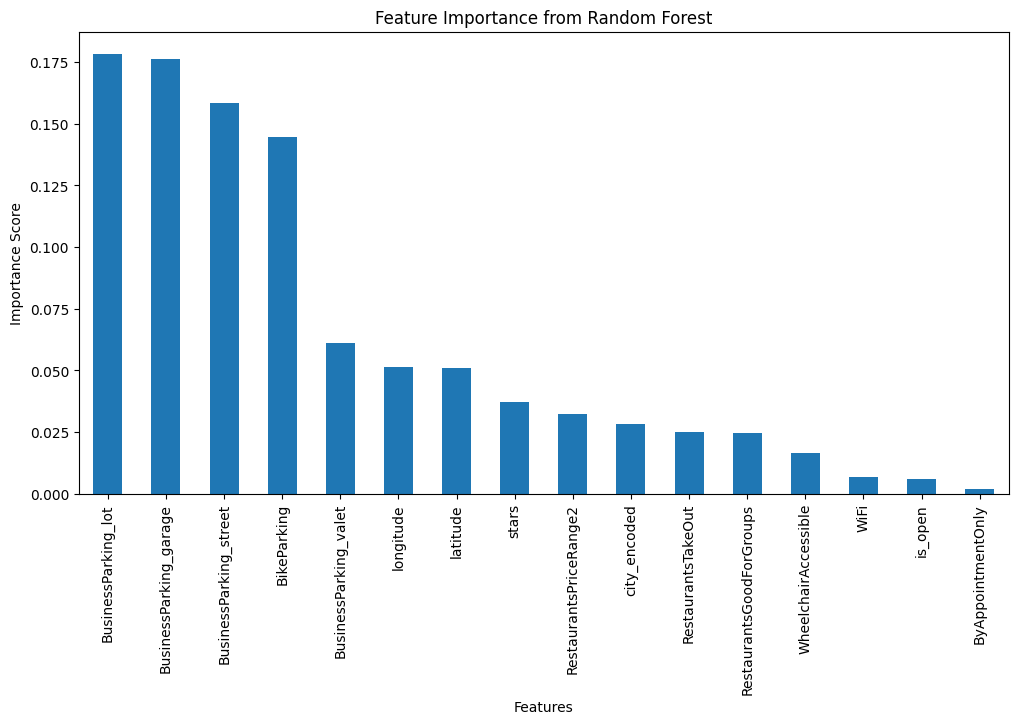

In [143]:
# Feature importance using Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_smote, y_train_smote)


importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()



### summary

1. **Data Cleaning**:
   - Addressed missing values by filling with appropriate substitutes (eg `False` for boolean features, mode for categorical features).

2. **Feature Engineering**:
   - Converted boolean values to integers (0 and 1) for easier modeling.
   - Used frequency encoding for city, replacing cities with their counts of occurrences.


### Feature Explanation and Relation to parking_status

1. **stars**:
   - higher ratings may correlate with better amenities, including parking.

2. **is_open**:
   - Indicates whether the business is currently open, affecting customer flow and parking needs.

3. **latitude and longitude**:
   - Geographical features help identify location-related parking dynamics.

4. **ByAppointmentOnly**:
   - Appointment-only businesses may have fewer visitors at any time, reducing parking demand.

5. **BikeParking**: self explnatory

6. **RestaurantsPriceRange2**:
   - Price range attracts different demographics, impacting expected customer volumes and parking needs.

7. **RestaurantsTakeOut**:
   - Takeout options may result in no parking requirements compared to dine-in services.

8. **WiFi**:
   - Availability can attract more customers who may stay longer, influencing parking duration.

9. **WheelchairAccessible**:
   - Accessibility features are important for certain segments, potentially affecting parking usage.

10. **RestaurantsGoodForGroups**:
    - Suitable for group gatherings, leading to larger customer volumes and increased parking demand.

11. **BusinessParking_garage, BusinessParking_street, BusinessParking_lot, BusinessParking_valet**:
    - Direct indicators of available parking types; critical for predicting parking availability.

12. **city_encoded**:
    - Represents city frequency,some cities may have more or fewer parking challenges based on urban factors.

**Target Variable** - Parking Status

 values - 0 indicate no parking

 value - 1 indicate parking available but not validated

 value -2 indicates parking available and validated



**Train test split**

**SMOTE to handle imbalance in the data**

**Feature Importance using Random Forest**

**Will compare feature importance after implementation of Lime**
